# Regresión Logística


Documentación en sklearn del método de [regresión logística](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)


In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
def plot_decision_boundary2(model, X, y):
    X = X.T
    y = y.T

    # Set min and max values and give it some padding
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    h = 0.01

    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # Predict the function value for the whole grid
    Z = model(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    ax = plt.gca()
    ax.set_aspect(1)
    # plt.axis("equal")
    # plt.contourf(xx, yy, Z, cmap=plt.cm.ocean, alpha=0.5)
    plt.contourf(xx, yy, Z, colors=["red", "royalblue"], alpha=0.2)
    # plt.contourf(xx, yy, Z, cmap=plt.cm.Pastel1, alpha=0.5)
    # plt.scatter(X[0, y==1], X[1, y==1], color="dodgerblue", edgecolors='k', label="1")
    plt.scatter(X[0, y == 1], X[1, y == 1], color="royalblue", label="1")
    plt.scatter(X[0, y == -1], X[1, y == -1], color="red", label="-1")
    plt.legend()

Ejemplo basado en [este link](https://scikit-learn.org/stable/auto_examples/linear_model/plot_iris_logistic.html).


Vamos a usar la base de datos de Iris para ver la regresión logística:


![images/Three-classes-of-IRIS.jpg](https://raw.githubusercontent.com/DiploDatos/AprendizajeSupervisado/master/Te%C3%B3rico/images/Three-classes-of-IRIS.jpg)


In [3]:
# import some data to play with
iris = datasets.load_iris()

In [4]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [5]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

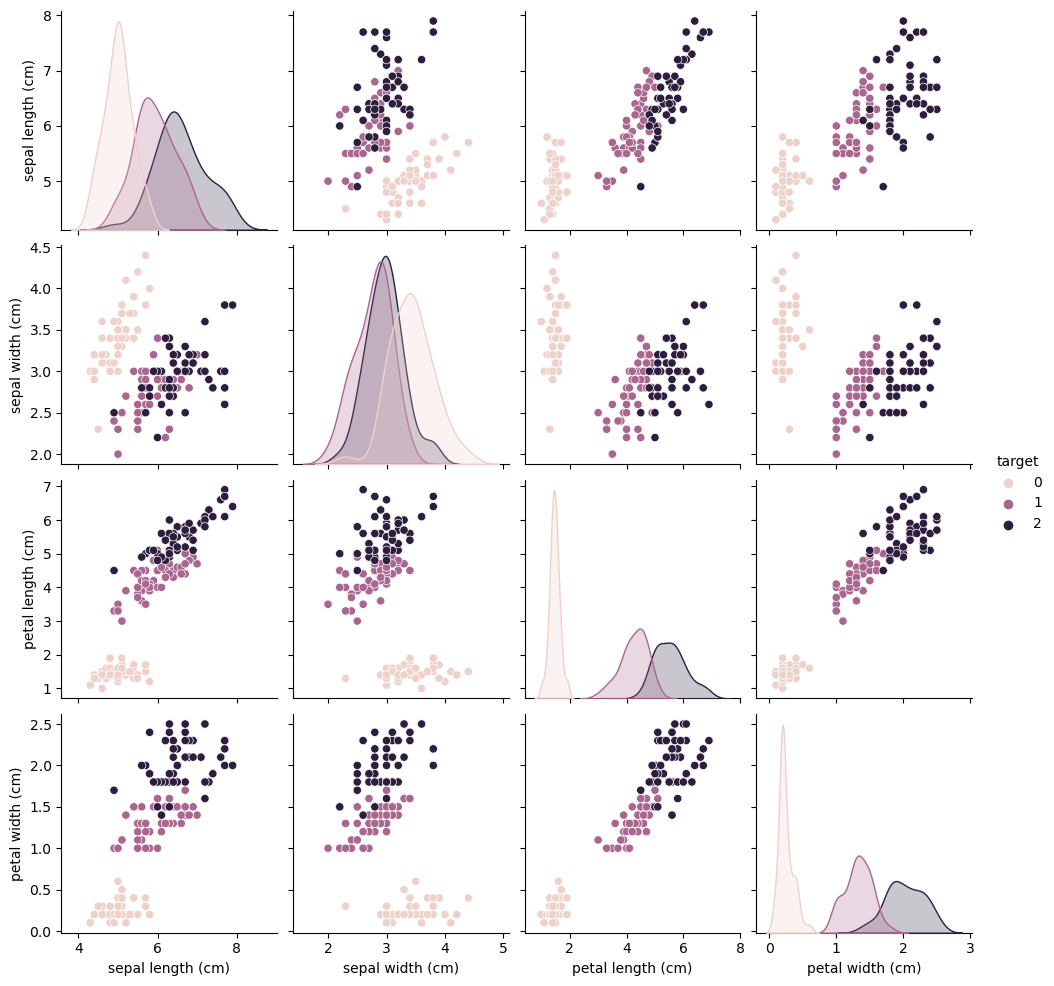

In [6]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target
sns.pairplot(df, hue='target')
plt.show()

Reduzcamos la base de datos para facilitar la comprensión de lo que estamos haciendo


In [7]:
X = iris.data[:, :2]  # we only take the first two features.
# sepal length, sepal width
y = iris.target
X = X[y < 2]            # we only take two classes
y = y[y < 2]            # we only take two classes
# setosa y versicolor

In [8]:
def plot_decision_boundary(X, y, regression):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = .02  # step size in the mesh
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = regression.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(1, figsize=(4, 3))
    cmap = plt.colormaps['PiYG']
    # plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Pastel1)
    plt.pcolormesh(xx, yy, Z, cmap=cmap, alpha=0.2)

    # Plot also the training points
    # plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Pastel1)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='w', cmap=cmap)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')

    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())

    plt.show()

Probemos diferentes argumentos del método _LogisticRegression_ para ver qué pasa...


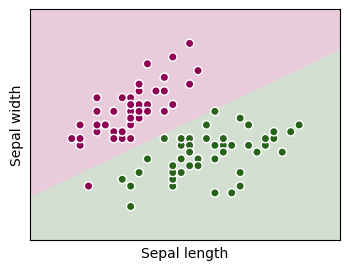

In [9]:
# create an instance of Logistic Regression Classifier
logreg = LogisticRegression(C=1e+3, solver='liblinear', max_iter=2).fit(X, y)
plot_decision_boundary(X, y, logreg)

Algo de información acerca de los [solvers](https://stackoverflow.com/questions/38640109/logistic-regression-python-solvers-definitions) o métodos de optimización que utiliza scikit-learn para encontrar un mínimo.


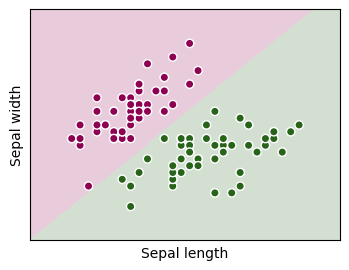

In [10]:
# update the number of iterations
logreg = LogisticRegression(C=1e+3, solver='liblinear', max_iter=20).fit(X, y)
plot_decision_boundary(X, y, logreg)

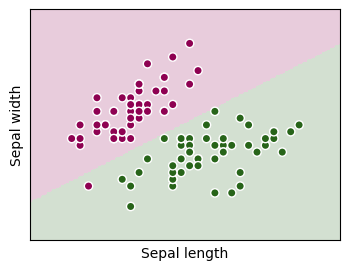

In [11]:
# update the number of iterations
logreg = LogisticRegression(
    C=1e+3, solver='liblinear', max_iter=20, penalty='l1').fit(X, y)
plot_decision_boundary(X, y, logreg)

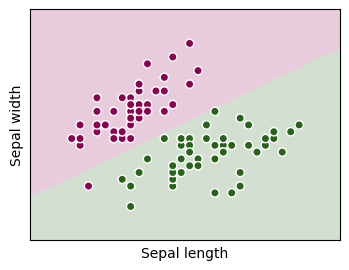

In [12]:
logreg = LogisticRegression(
    C=1e+8, solver='saga', max_iter=20, penalty='elasticnet', l1_ratio=0.7).fit(X, y)
plot_decision_boundary(X, y, logreg)

In [13]:
logreg.predict_proba([X[1]])

array([[0.71958622, 0.28041378]])

In [14]:
import plotly.express as px
df = px.data.iris()
fig = px.scatter_3d(df, x='sepal_length', y='sepal_width', z='petal_width', size='petal_length', size_max=18,
                    color='species')
fig.show()